## Scarborough Neighborhood

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
# download url data from internet
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source = requests.get(url).text
Canada_data = BeautifulSoup(source, 'lxml')

# creat a new Dataframe
column_names = ['Postalcode','Borough','Neighborhood']
toronto = pd.DataFrame(columns = column_names)
content = Canada_data.find('div', class_='mw-parser-output')
table = content.table.tbody
postcode = 0
borough = 0
neighborhood = 0

for tr in table.find_all('tr'):
    i = 0
    for td in tr.find_all('td'):
        if i == 0:
            postcode = td.text
            postcode = td.text.strip('\n').replace(']','')
            i = i + 1
        elif i == 1:
            borough = td.text
            borough = td.text.strip('\n').replace(']','')
            i = i + 1
        elif i == 2: 
            neighborhood = td.text.strip('\n').replace(']','')
    toronto = toronto.append({'Postalcode': postcode,'Borough': borough,'Neighborhood': neighborhood},ignore_index=True)

# clean dataframe 
toronto = toronto[toronto.Borough!='Not assigned']
toronto = toronto[toronto.Borough!= 0]
toronto.reset_index(drop = True, inplace = True)
i = 0
for i in range(0,toronto.shape[0]):
    if toronto.iloc[i][2] == 'Not assigned':
        toronto.iloc[i][2] = toronto.iloc[i][1]
        i = i+1
                                 
df = toronto.groupby(['Postalcode','Borough'])['Neighborhood'].apply(', '.join).reset_index()

def neighborhood_list(grouped):    
    return ', '.join(sorted(grouped['Neighborhood'].tolist()))
                    
grp = df.groupby(['Postalcode', 'Borough'])
df2 = grp.apply(neighborhood_list).reset_index(name='Neighborhood')
df2.rename(columns={'Postalcode':'Postal Code'}, inplace=True)
df2.head()

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


## Geo details of Scarborough Neighborhood

In [3]:
toronto_geocsv = 'https://cocl.us/Geospatial_data'
!wget -q -O 'toronto_m.geospatial_data.csv' toronto_geocsv
geocsv_data = pd.read_csv(toronto_geocsv).set_index("Postal Code")

df = pd.merge(geocsv_data, df2, on='Postal Code')
df.rename(columns={'Postal Code':'PostalCode'}, inplace=True)
df=df[['PostalCode','Borough','Neighborhood','Latitude','Longitude']]
df.head()

Scarborough_data = df[df['Borough'] == 'Scarborough']
Scarborough_data

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


## Utilizing the Foursquare API to explore the neighborhoods and segment them.

### Foursquare API Details 

In [4]:
CLIENT_ID = 'JMKW4IK1WEJT4JLZS25GMHK3WAKBO0ROX00GGOREKC2IYOBM' # your Foursquare ID
CLIENT_SECRET = 'T1NF3ILCSHE3Z5OFG3UC2Z4E1BQAYS4T4L5A0F4F53PL00RL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JMKW4IK1WEJT4JLZS25GMHK3WAKBO0ROX00GGOREKC2IYOBM
CLIENT_SECRET:T1NF3ILCSHE3Z5OFG3UC2Z4E1BQAYS4T4L5A0F4F53PL00RL


#### Use geopy library to get the latitude and longitude values of Scarborough.

In [5]:
address = 'Scarborough,Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Scarborough are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Scarborough are 43.773077, -79.257774.


#### Map of Scarborough  with neighborhoods superimposed on top.

In [6]:
# create map of Manhattan using latitude and longitude values
map_Scarborough = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Scarborough_data['Latitude'], Scarborough_data['Longitude'], Scarborough_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Scarborough)  
    
map_Scarborough

####  Explore Neighborhoods in Scarborough

In [7]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            500)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [8]:
# type your answer here

Scarborough_venues = getNearbyVenues(names=Scarborough_data['Neighborhood'],
                                   latitudes=Scarborough_data['Latitude'],
                                   longitudes=Scarborough_data['Longitude']
                                  )


Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge


In [9]:
print(Scarborough_venues.shape)
Scarborough_venues.head()

(91, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Affordable Toronto Movers,43.787919,-79.162977,Moving Target
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store


In [10]:
Scarborough_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Birch Cliff, Cliffside West",4,4,4,4,4,4
Cedarbrae,8,8,8,8,8,8
"Clarks Corners, Tam O'Shanter, Sullivan",12,12,12,12,12,12
"Cliffside, Cliffcrest, Scarborough Village West",4,4,4,4,4,4
"Dorset Park, Wexford Heights, Scarborough Town Centre",5,5,5,5,5,5
"Golden Mile, Clairlea, Oakridge",9,9,9,9,9,9
"Guildwood, Morningside, West Hill",8,8,8,8,8,8
"Kennedy Park, Ionview, East Birchmount Park",5,5,5,5,5,5


##  Analyze Each Neighborhood

In [11]:
# one hot encoding
Scarborough_onehot = pd.get_dummies(Scarborough_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Scarborough_onehot['Neighborhood'] = Scarborough_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Scarborough_onehot.columns[-1]] + list(Scarborough_onehot.columns[:-1])
Scarborough_onehot = Scarborough_onehot[fixed_columns]

Scarborough_onehot.head()
Scarborough_grouped = Scarborough_onehot.groupby('Neighborhood').mean().reset_index()
Scarborough_grouped

,Neighborhood,American Restaurant,Athletics & Sports,Auto Garage,Bakery,Bank,Bar,Breakfast Spot,Bus Line,Bus Station,Café,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,College Stadium,Convenience Store,Department Store,Discount Store,Electronics Store,Fast Food Restaurant,Fried Chicken Joint,Gas Station,General Entertainment,Grocery Store,Hakka Restaurant,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Jewelry Store,Korean Restaurant,Latin American Restaurant,Lounge,Medical Center,Metro Station,Mexican Restaurant,Motel,Movie Theater,Moving Target,Noodle House,Park,Pet Store,Pharmacy,Pizza Place,Playground,Rental Car Location,Sandwich Place,Shopping Mall,Skating Rink,Soccer Field,Thai Restaurant,Vietnamese Restaurant
0,Agincourt,0.00,0.000,0.0,0.000000,0.000000,0.0,0.250000,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.25,0.25,0.000,0.000000,0.000,0.00,0.00,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.25,0.000000,0.000000,0.0
1,"Birch Cliff, Cliffside West",0.00,0.000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.25,0.000,0.000000,0.000000,0.25,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.25,0.000000,0.000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000,0.000000,0.000,0.00,0.00,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.25,0.000000,0.000000,0.0
2,Cedarbrae,0.00,0.125,0.0,0.125000,0.125000,0.0,0.000000,0.000000,0.000000,0.00,0.125,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000,0.000000,0.125000,0.125000,0.00,0.000000,0.125,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000,0.000000,0.000,0.00,0.00,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.125000,0.0
3,"Clarks Corners, Tam O'Shanter, Sullivan",0.00,0.000,0.0,0.000000,0.083333,0.0,0.000000,0.000000,0.000000,0.00,0.000,0.083333,0.000000,0.00,0.0,0.0,0.000000,0.000,0.083333,0.083333,0.083333,0.00,0.000000,0.000,0.000000,0.00,0.000000,0.083333,0.000000,0.00,0.00,0.00,0.000,0.000000,0.000,0.00,0.00,0.000,0.083333,0.000000,0.0,0.083333,0.166667,0.000000,0.000,0.000000,0.083333,0.00,0.000000,0.083333,0.0
4,"Cliffside, Cliffcrest, Scarborough Village West",0.25,0.000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.00,0.250000,0.000000,0.000000,0.00,0.00,0.00,0.000,0.000000,0.000,0.25,0.25,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.0
5,"Dorset Park, Wexford Heights, Scarborough Town...",0.00,0.000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000,0.200000,0.000000,0.00,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.40,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000,0.000000,0.000,0.00,0.00,0.000,0.000000,0.000000,0.2,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.2
6,"Golden Mile, Clairlea, Oakridge",0.00,0.000,0.0,0.222222,0.000000,0.0,0.000000,0.111111,0.111111,0.00,0.000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.111111,0.00,0.111111,0.000000,0.000000,0.00,0.00,0.00,0.000,0.111111,0.000,0.00,0.00,0.000,0.000000,0.111111,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00,0.111111,0.000000,0.0
7,"Guildwood, Morningside, West Hill",0.00,0.000,0.0,0.000000,0.125000,0.0,0.125000,0.000000,0.000000,0.00,0.000,0.000000,0.000000,0.00,0.0,0.0,0.000000,0.125,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.00,0.125000,0.000000,0.000000,0.00,0.00,0.00,0.125,0.000000,0.125,0.00,0.00,0.125,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.125,0.000000,0.000000,0.00,0.000000,0.000000,0.0
8,"Kennedy Park, Ionview, East Birchmount Park",0.00,0.000,0.0,0.000000,0.000000,0.

#### Let's print each neighborhood along with the top 5 most common venues

In [12]:
num_top_venues = 5

for hood in Scarborough_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Scarborough_grouped[Scarborough_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0               Skating Rink  0.25
1  Latin American Restaurant  0.25
2             Breakfast Spot  0.25
3                     Lounge  0.25
4        American Restaurant  0.00


----Birch Cliff, Cliffside West----
                   venue  freq
0        College Stadium  0.25
1           Skating Rink  0.25
2  General Entertainment  0.25
3                   Café  0.25
4           Noodle House  0.00


----Cedarbrae----
                venue  freq
0     Thai Restaurant  0.12
1              Bakery  0.12
2                Bank  0.12
3  Athletics & Sports  0.12
4    Hakka Restaurant  0.12


----Clarks Corners, Tam O'Shanter, Sullivan----
                  venue  freq
0           Pizza Place  0.17
1    Italian Restaurant  0.08
2  Fast Food Restaurant  0.08
3          Noodle House  0.08
4           Gas Station  0.08


----Cliffside, Cliffcrest, Scarborough Village West----
                 venue  freq
0  American Restaurant  0.25
1             

In [13]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Scarborough_grouped['Neighborhood']

for ind in np.arange(Scarborough_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Scarborough_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Skating Rink,Breakfast Spot,Latin American Restaurant,Lounge,Vietnamese Restaurant,College Stadium,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
1,"Birch Cliff, Cliffside West",Skating Rink,General Entertainment,Café,College Stadium,Vietnamese Restaurant,Coffee Shop,Grocery Store,Gas Station,Fried Chicken Joint,Fast Food Restaurant
2,Cedarbrae,Thai Restaurant,Athletics & Sports,Hakka Restaurant,Bakery,Bank,Gas Station,Fried Chicken Joint,Caribbean Restaurant,Convenience Store,Grocery Store
3,"Clarks Corners, Tam O'Shanter, Sullivan",Pizza Place,Bank,Noodle House,Pharmacy,Italian Restaurant,Gas Station,Fast Food Restaurant,Shopping Mall,Thai Restaurant,Fried Chicken Joint
4,"Cliffside, Cliffcrest, Scarborough Village West",American Restaurant,Movie Theater,Intersection,Motel,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Discount Store
5,"Dorset Park, Wexford Heights, Scarborough Town...",Indian Restaurant,Pet Store,Chinese Restaurant,Vietnamese Restaurant,Shopping Mall,Soccer Field,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store
6,"Golden Mile, Clairlea, Oakridge",Bakery,Metro Station,Soccer Field,Ice Cream Shop,Intersection,Bus Line,Bus Station,Park,Vietnamese Restaurant,Gas Station
7,"Guildwood, Morningside, West Hill",Mexican Restaurant,Intersection,Bank,Rental Car Location,Breakfast Spot,Electronics Store,Moving Target,Medical Center,Vietnamese Restaurant,Gas Station
8,"Kennedy Park, Ionview, East Birchmount Park",Coffee Shop,Discount Store,Bus Station,Department Store,Convenience Store,Vietnamese Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint
9,"Malvern, Rouge",Fast Food Restaurant,Vietnamese Restaurant,Coffee Shop,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Electronics Store,Discount Store,Department Store


##   Cluster Neighborhoods

In [14]:
# set number of clusters
kclusters = 5

Scarborough_grouped_clustering = Scarborough_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Scarborough_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [15]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Scarborough_merged = Scarborough_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Scarborough_merged = Scarborough_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Scarborough_merged # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,1.0,Fast Food Restaurant,Vietnamese Restaurant,Coffee Shop,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Electronics Store,Discount Store,Department Store
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,2.0,Moving Target,Bar,Coffee Shop,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Discount Store
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0,Mexican Restaurant,Intersection,Bank,Rental Car Location,Breakfast Spot,Electronics Store,Moving Target,Medical Center,Vietnamese Restaurant,Gas Station
3,M1G,Scarborough,Woburn,43.770992,-79.216917,4.0,Coffee Shop,Korean Restaurant,Indian Restaurant,Auto Garage,Convenience Store,Grocery Store,General Entertainment,Gas Station,Athletics & Sports,Fried Chicken Joint
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,Thai Restaurant,Athletics & Sports,Hakka Restaurant,Bakery,Bank,Gas Station,Fried Chicken Joint,Caribbean Restaurant,Convenience Store,Grocery Store
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,0.0,Grocery Store,Jewelry Store,Playground,Coffee Shop,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Discount Store
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029,0.0,Coffee Shop,Discount Store,Bus Station,Department Store,Convenience Store,Vietnamese Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577,0.0,Bakery,Metro Station,Soccer Field,Ice Cream Shop,Intersection,Bus Line,Bus Station,Park,Vietnamese Restaurant,Gas Station
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476,0.0,American Restaurant,Movie Theater,Intersection,Motel,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Discount Store
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,0.0,Skating Rink,General Entertainment,Café,College Stadium,Vietnamese Restaurant,Coffee Shop,Grocery Store,Gas Station,Fried Chicken Joint,Fast Food Restaurant


In [16]:

# drop rows
Scarborough_merged.dropna(subset=["Cluster Labels"], axis=0, inplace = True)

# convert the Cluster Lables to an integer
Scarborough_merged['Cluster Labels'] = Scarborough_merged['Cluster Labels'].astype("int")

# check the rows have been droppped
Scarborough_merged

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,1,Fast Food Restaurant,Vietnamese Restaurant,Coffee Shop,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Electronics Store,Discount Store,Department Store
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,2,Moving Target,Bar,Coffee Shop,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Discount Store
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0,Mexican Restaurant,Intersection,Bank,Rental Car Location,Breakfast Spot,Electronics Store,Moving Target,Medical Center,Vietnamese Restaurant,Gas Station
3,M1G,Scarborough,Woburn,43.770992,-79.216917,4,Coffee Shop,Korean Restaurant,Indian Restaurant,Auto Garage,Convenience Store,Grocery Store,General Entertainment,Gas Station,Athletics & Sports,Fried Chicken Joint
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0,Thai Restaurant,Athletics & Sports,Hakka Restaurant,Bakery,Bank,Gas Station,Fried Chicken Joint,Caribbean Restaurant,Convenience Store,Grocery Store
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,0,Grocery Store,Jewelry Store,Playground,Coffee Shop,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Discount Store
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029,0,Coffee Shop,Discount Store,Bus Station,Department Store,Convenience Store,Vietnamese Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577,0,Bakery,Metro Station,Soccer Field,Ice Cream Shop,Intersection,Bus Line,Bus Station,Park,Vietnamese Restaurant,Gas Station
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476,0,American Restaurant,Movie Theater,Intersection,Motel,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant,Electronics Store,Discount Store
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,0,Skating Rink,General Entertainment,Café,College Stadium,Vietnamese Restaurant,Coffee Shop,Grocery Store,Gas Station,Fried Chicken Joint,Fast Food Restaurant


In [17]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Scarborough_merged['Latitude'], Scarborough_merged['Longitude'], Scarborough_merged['Neighborhood'], Scarborough_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [28]:
scarborough_Avg_HousingPrice=pd.DataFrame({"Neighborhood":Scarborough_merged["Neighborhood"],
                                      "Average_Housing_Price":[335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0
                                                              
                                                              
                                                              ]})

#### AVG Housing pricing in scarborough neighbourhood 

In [29]:
scarborough_Avg_HousingPrice

,Neighborhood,Average_Housing_Price
0,"Malvern, Rouge",335000.0
1,"Rouge Hill, Port Union, Highland Creek",286600.0
2,"Guildwood, Morningside, West Hill",175000.0
3,Woburn,225900.0
4,Cedarbrae,219400.0
5,Scarborough Village,573900.0
6,"Kennedy Park, Ionview, East Birchmount Park",225000.0
7,"Golden Mile, Clairlea, Oakridge",370500.0
8,"Cliffside, Cliffcrest, Scarborough Village West",370500.0
9,"Birch Cliff, Cliffside West",433500.0


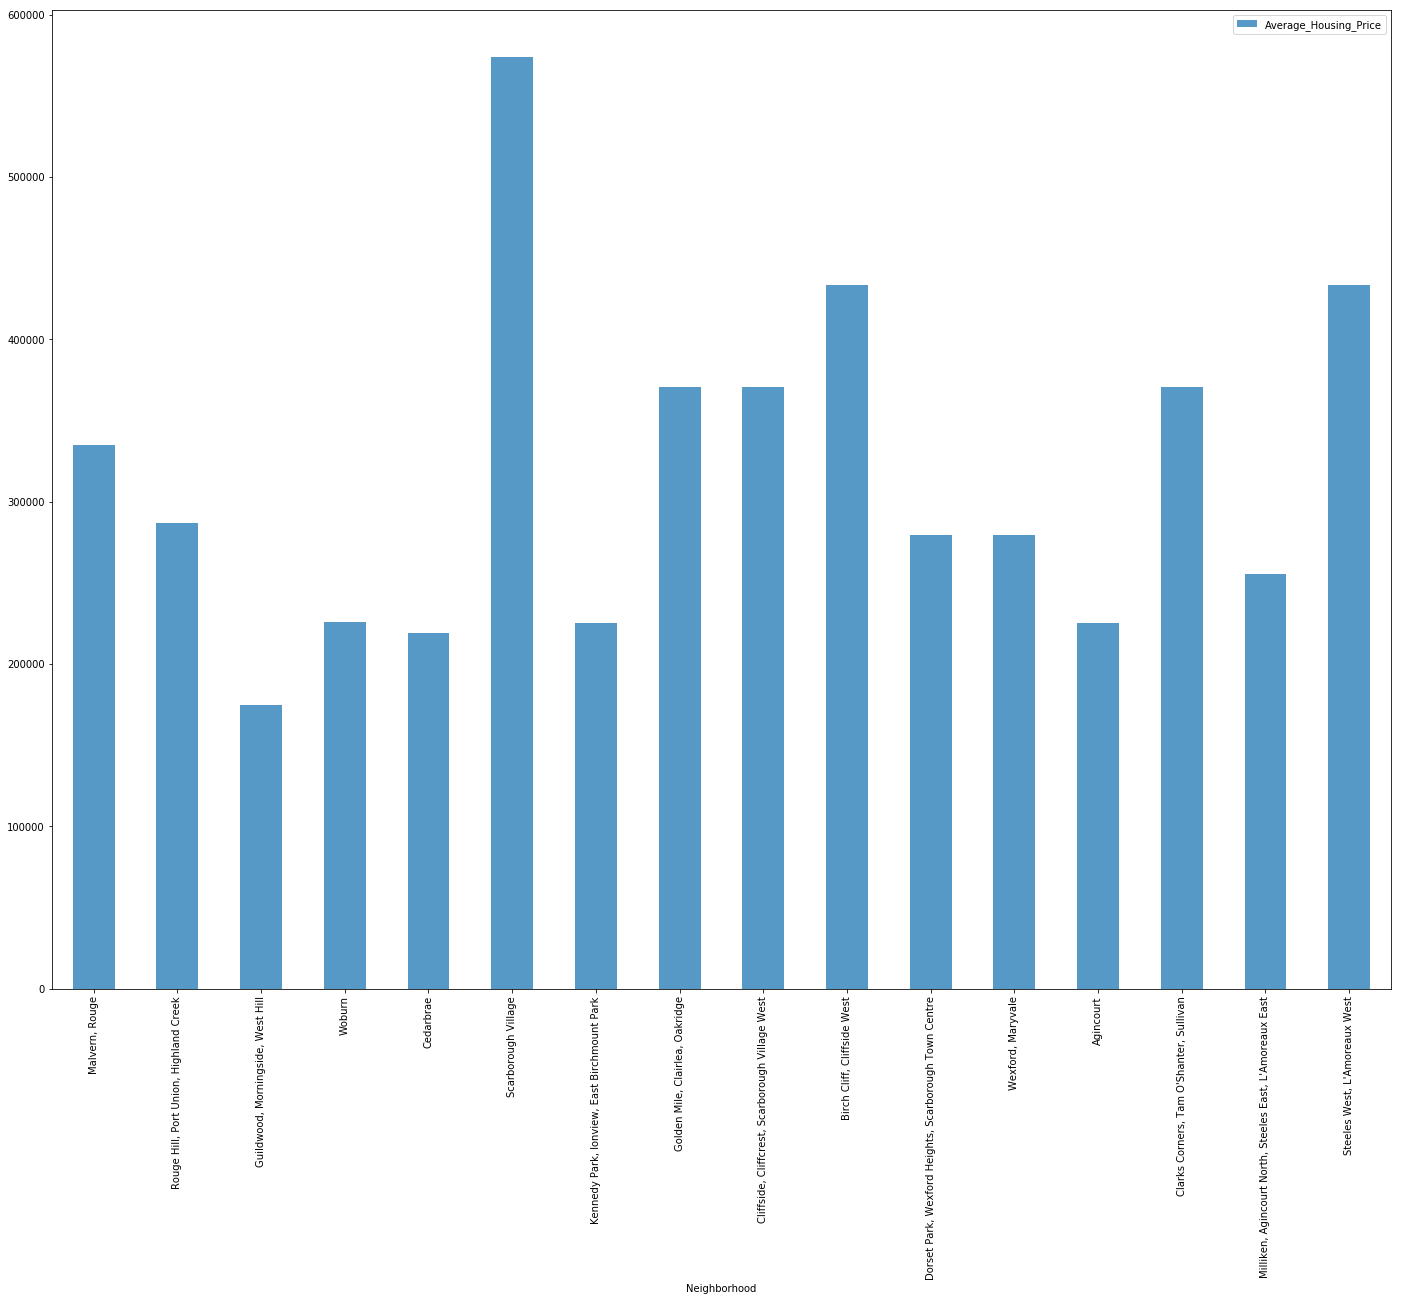

In [39]:
#scarborough_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)

scarborough_Avg_HousingPrice.plot(kind='bar',figsize=(24,18),alpha=0.75)

In [49]:
#Source:https://www.greatschools.org
Scarborough_school_ratings=pd.DataFrame({"Neighborhood":Scarborough_merged["Neighborhood"],
                                      "Top School Rating":[7,9,5,8,10,10,7,10,1,2,1,2,7,2,3,2
                                                           ]})

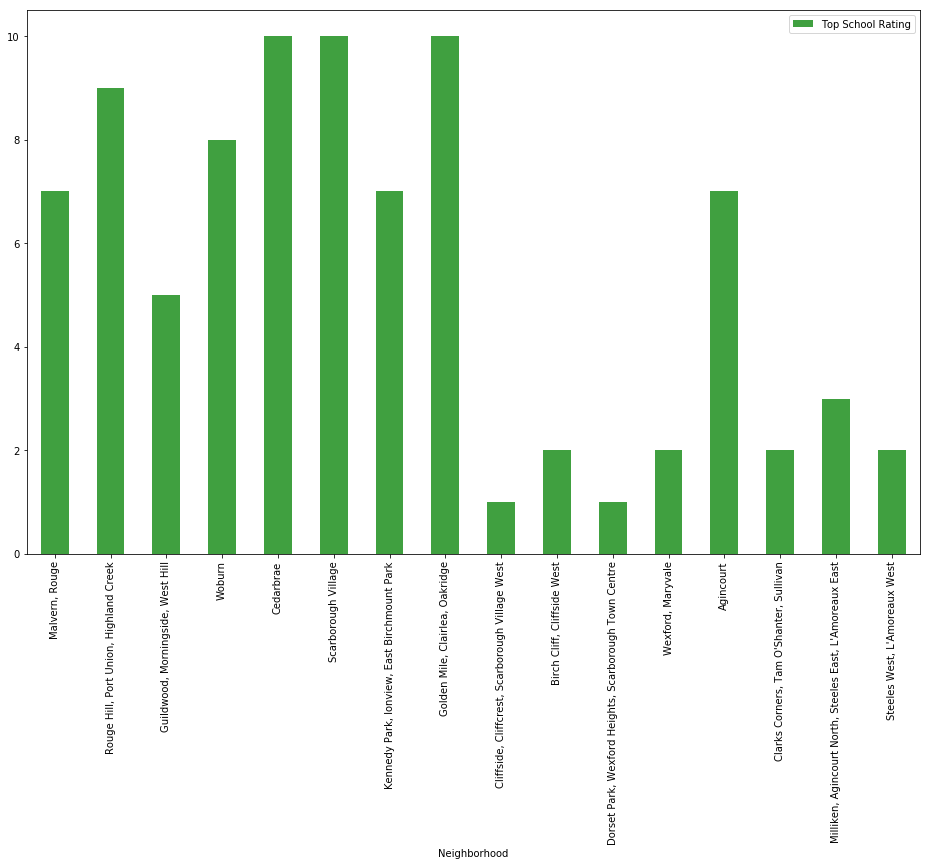

In [50]:
Scarborough_school_ratings.set_index('Neighborhood',inplace=True,drop=True)
Scarborough_school_ratings.plot(kind='bar',figsize=(16,10),color='green',alpha=0.75);
